# Code For Data Analysis Project

In [1]:
import numpy as np
import pandas as pd
import pickle
from pandas_profiling import ProfileReport



OSError: Could not load shared object file: libllvmlite.dylib

In [ ]:
import C:\User\UserName\.jupyter\custom\custom.css

In [5]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# Reading the data

In [2]:
pd.read_csv('perksovite.csv')
df = pd.read_csv('perksovite.csv')
df.head(200)




,name,_rxn_organic-inchikey,_rxn_M_acid,_rxn_M_inorganic,_rxn_M_organic,_solv_GBL,_solv_DMSO,_solv_DMF,_stoich_mmol_org,_stoich_mmol_inorg,...,_feat_organic_0_chainatomcount_std,_feat_organic_0_ringatomcount_std,_raw_modelname,_feat_primaryAmine,_feat_secondaryAmine,_rxn_plateEdgeQ,_feat_maxproj_per_N,_feat_vdw_per_N,_raw_RelativeHumidity,_out_crystalscore
0,2018-07-06T15_40_16.425303+00_00_LBL_A1,XFYICZOIWSBQSK-UHFFFAOYSA-N,6.219603,0.249044,0.721707,1,0,0,0.470553,0.162377,...,3.0,0.0,escalate_ExpertQuasiRandom_1.1,1,0,1,22.850000,112.020000,-1.000000,1.0
1,2018-07-06T15_40_16.425303+00_00_LBL_C1,XFYICZOIWSBQSK-UHFFFAOYSA-N,6.754488,0.253438,0.858792,1,0,0,0.576249,0.170057,...,3.0,0.0,escalate_ExpertQuasiRandom_1.1,1,0,1,22.850000,112.020000,-1.000000,1.0
2,2018-07-06T15_40_16.425303+00_00_LBL_E1,XFYICZOIWSBQSK-UHFFFAOYSA-N,6.754488,0.415311,0.948975,1,0,0,0.636762,0.278674,...,3.0,0.0,escalate_ExpertQuasiRandom_1.1,1,0,1,22.850000,112.020000,-1.000000,4.0
3,2018-07-06T15_40_16.425303+00_00_LBL_G1,XFYICZOIWSBQSK-UHFFFAOYSA-N,6.783878,0.494693,1.522682,1,0,0,1.023242,0.332434,...,3.0,0.0,escalate_ExpertQuasiRandom_1.1,1,0,1,22.850000,112.020000,-1.000000,4.0
4,2018-07-06T15_40_16.425303+00_00_LBL_B1,XFYICZOIWSBQSK-UHFFFAOYSA-N,6.636048,0.335557,1.266763,1,0,0,0.844931,0.223817,...,3.0,0.0,escalate_ExpertQuasiRandom_1.1,1,0,1,22.850000,112.020000,-1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2018-07-12T19_22_54.635369+00_00_LBL_G1,UUDRLGYROXTISK-UHFFFAOYSA-N,4.885813,0.656387,1.203603,1,0,0,0.737809,0.402365,...,4.0,0.0,escalate_ExpertQuasiRandom_1.1,1,1,1,8.553333,31.893333,49.894334,1.0
196,2018-07-12T19_22_54.635369+00_00_LBL_B1,UUDRLGYROXTISK-UHFFFAOYSA-N,4.885813,0.957839,0.715002,1,0,0,0.438296,0.587156,...,4.0,0.0,escalate_ExpertQuasiRandom_1.1,1,1,1,8.553333,31.893333,49.894334,4.0
197,2018-07-12T19_22_54.635369+00_00_LBL_D1,UUDRLGYROXTISK-UHFFFAOYSA-N,2.707444,1.217833,0.714292,1,0,0,0.398575,0.679551,...,4.0,0.0,escalate_ExpertQuasiRandom_1.1,1,1,1,8.553333,31.893333,49.894334,2.0
198,2018-07-12T19_22_54.635369+00_00_LBL_F1,UUDRLGYROXTISK-UHFFFAOYSA-N,6.695445,0.739552,0.812183,1,0,0,0.543350,0.494760,...,4.0,0.0,escalate_ExpertQuasiRandom_1.1,1,1,1,8.553333,31.893333,49.894334,4.0


In [8]:
df.describe()

,_rxn_M_acid,_rxn_M_inorganic,_rxn_M_organic,_solv_GBL,_solv_DMSO,_solv_DMF,_stoich_mmol_org,_stoich_mmol_inorg,_stoich_mmol_acid,_stoich_mmol_solv,...,_feat_organic_0_bondcount_std,_feat_organic_0_chainatomcount_std,_feat_organic_0_ringatomcount_std,_feat_primaryAmine,_feat_secondaryAmine,_rxn_plateEdgeQ,_feat_maxproj_per_N,_feat_vdw_per_N,_raw_RelativeHumidity,_out_crystalscore
count,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,...,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000
mean,5.928279,0.453489,1.013820,0.736246,0.135183,0.134002,0.596932,0.267269,3.568732,4.803614,...,15.248996,3.671074,1.885360,0.795514,0.327391,0.370130,28.909326,142.572981,45.693816,1.961275
std,3.296556,0.318083,0.614967,0.440694,0.341939,0.340675,0.375529,0.189052,2.039949,0.976891,...,6.227796,2.420970,2.746668,0.403350,0.469289,0.482868,13.798166,73.206887,15.271596,1.153334
min,0.000000,0.002021,0.012706,0.000000,0.000000,0.000000,0.008620,0.001011,0.000000,0.340742,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.553333,31.893333,-1.000000,1.000000
25%,3.498588,0.191962,0.549689,0.000000,0.000000,0.000000,0.309202,0.110693,1.881816,4.286192,...,10.000000,3.000000,0.000000,1.000000,0.000000,0.000000,21.370000,101.185000,39.001227,1.000000
50%,5.990171,0.414997,0.906405,1.000000,0.000000,0.000000,0.518005,0.238189,3.551597,4.966218,...,15.000000,3.000000,0.000000,1.000000,0.000000,0.000000,22.940000,117.730000,49.648318,1.000000
75%,8.098583,0.649419,1.369794,1.000000,0.000000,0.000000,0.818346,0.397047,5.221377,5.523846,...,19.000000,5.000000,5.000000,1.000000,1.000000,1.000000,35.140000,186.950000,56.292808,3.000000
max,24.755160,1.700287,4.075476,1.000000,1.000000,1.000000,2.037738,0.926847,12.377580,6.950792,...,40.000000,13.000000,8.000000,1.000000,1.000000,1.000000,80.650000,417.970000,62.997802,4.000000


In [ ]:
##To generate a Pandas Profiling report, run the following lines of code
import pandas_profiling as pp
profile = ProfileReport(df, title ="Pandas Profiling Report"

In [9]:
print(df.shape)
# the output of this means that this table contains 8470 rows and 
# and 56 colums

(8470, 56)


In [10]:
print(df.columns)
#This prints out the column names for us

Index(['name', '_rxn_organic-inchikey', '_rxn_M_acid', '_rxn_M_inorganic',
       '_rxn_M_organic', '_solv_GBL', '_solv_DMSO', '_solv_DMF',
       '_stoich_mmol_org', '_stoich_mmol_inorg', '_stoich_mmol_acid',
       '_stoich_mmol_solv', '_stoich_org/solv', '_stoich_inorg/solv',
       '_stoich_acid/solv', '_stoich_org+inorg/solv',
       '_stoich_org+inorg+acid/solv', '_stoich_org/liq', '_stoich_inorg/liq',
       '_stoich_org+inorg/liq', '_stoich_org/inorg', '_stoich_acid/inorg',
       '_rxn_temperature_c', '_rxn_reactiontime_s',
       '_feat_organic_0_avgpol_std', '_feat_organic_0_refractivity_std',
       '_feat_organic_0_maximalprojectionarea_std',
       '_feat_organic_0_maximalprojectionradius_std',
       '_feat_organic_0_maximalprojectionsize_std',
       '_feat_organic_0_minimalprojectionarea_std',
       '_feat_organic_0_minimalprojectionradius_std',
       '_feat_organic_0_minimalprojectionsize_std',
       '_feat_organic_0_molpol_std', '_feat_organic_0_asavdwp_std',
    

In [11]:
print (df.info())
# This method allows us to output general info about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Data columns (total 56 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   name                                               8470 non-null   object 
 1   _rxn_organic-inchikey                              8470 non-null   object 
 2   _rxn_M_acid                                        8470 non-null   float64
 3   _rxn_M_inorganic                                   8470 non-null   float64
 4   _rxn_M_organic                                     8470 non-null   float64
 5   _solv_GBL                                          8470 non-null   int64  
 6   _solv_DMSO                                         8470 non-null   int64  
 7   _solv_DMF                                          8470 non-null   int64  
 8   _stoich_mmol_org                                   8470 non-null   float64
 9   _stoich_

In [ ]:
# data types are float(47), int(6),object(3)

In [12]:
# To specifically see stats on non numerical features, we can use the include parameter to 
# indicate the specific data types of interest
df.describe(include = ["object", "bool"])

,name,_rxn_organic-inchikey,_raw_modelname
count,8470,8470,8470
unique,8470,46,33
top,2019-07-23T20_39_52.697300+00_00_LBL_C7,XFYICZOIWSBQSK-UHFFFAOYSA-N,escalate_ExpertQuasiRandom_1.2
freq,1,1645,1385


In [13]:
#why did they use floats instead of doubles?
# awe're going to use the value_counts methods to examine the distribution
# of the crystallization score
df["_out_crystalscore"].value_counts()
    #to calculate the fractions we would have to passs normalize = True to the value_counts function

1.0    4286
2.0    1743
4.0    1517
3.0     924
Name: _out_crystalscore, dtype: int64

In [14]:
df["_out_crystalscore"].value_counts(normalize=True)
#clearly there were

1.0    0.506021
2.0    0.205785
4.0    0.179103
3.0    0.109091
Name: _out_crystalscore, dtype: float64

# Sorting the data

In [ ]:
# We can sort the data by the value of one of the variables(columns). We 
# will sort by the relative humidity.

df.sort_values(by="_raw_RelativeHumidity", ascending = False)



# Indexing and retrievind the data

In [15]:
##What is the mean relative humidity
df["_raw_RelativeHumidity"].mean()

45.6938160711539

In [16]:
#Boolean indexing with one column is helpful. What we can do is use the logical condition that is checked for
# each element of a certain column.
# The results of such indexing is the DF consists of rows that 
#satisfies the cetain conditon on the certain column
df[df["_raw_RelativeHumidity"]==1].mean()

name                                                 NaN
_rxn_organic-inchikey                                NaN
_rxn_M_acid                                          NaN
_rxn_M_inorganic                                     NaN
_rxn_M_organic                                       NaN
_solv_GBL                                            NaN
_solv_DMSO                                           NaN
_solv_DMF                                            NaN
_stoich_mmol_org                                     NaN
_stoich_mmol_inorg                                   NaN
_stoich_mmol_acid                                    NaN
_stoich_mmol_solv                                    NaN
_stoich_org/solv                                     NaN
_stoich_inorg/solv                                   NaN
_stoich_acid/solv                                    NaN
_stoich_org+inorg/solv                               NaN
_stoich_org+inorg+acid/solv                          NaN
_stoich_org/liq                

In [17]:
df[df["_raw_RelativeHumidity"]==1]["_out_crystalscore"].mean()

nan

# Applying Functions to Cells,Columns and Rows

In [18]:
#To apply functions to each column
df.apply(np.max)

name                                                 2020-03-09T19_11_40.230086+00_00_LBL_H9
_rxn_organic-inchikey                                            ZEVRFFCPALTVDN-UHFFFAOYSA-N
_rxn_M_acid                                                                         24.75516
_rxn_M_inorganic                                                                    1.700287
_rxn_M_organic                                                                      4.075476
_solv_GBL                                                                                  1
_solv_DMSO                                                                                 1
_solv_DMF                                                                                  1
_stoich_mmol_org                                                                    2.037738
_stoich_mmol_inorg                                                                  0.926847
_stoich_mmol_acid                                                     

In [19]:
# the apply method can be used to apply afunction to each row in the data set. You can do this by specifying
#axis = 1. We can use Lambda functions to allow us to select all crystalscore variables that start with 6.

df[df["_out_crystalscore"].apply(lambda state : state[0]=="6")].head()

TypeError: 'float' object is not subscriptable

# Grouping

In [20]:
#grouping in pandas works as follows
#1 the groupby method divieds the gruoping columns by their values. They become a new index in the reuslting dataframe
#2 Then columns of interesta re selected (columns_to_show). If columns_to)show is not included, all nongroupby clauses,
#will be included
#3 Finally, one or several functions are applied to the obtained groups per selected columns.


#example of this is 
columns_to_show = ["_solv_GBL","_solv_DMF","_solv_DMSO"]

df.groupby(["_raw_RelativeHumidity"])[columns_to_show].describe(percentiles=[])

#not a great way of grouping 

_solv_GBL                                    _solv_DMF  \
                          count      mean       std  min  50%  max     count   
_raw_RelativeHumidity                                                          
-1.000000                 384.0  0.750000  0.433578  0.0  1.0  1.0     384.0   
 18.326946                 94.0  1.000000  0.000000  1.0  1.0  1.0      94.0   
 20.037970                 71.0  1.000000  0.000000  1.0  1.0  1.0      71.0   
 21.725510                 96.0  0.000000  0.000000  0.0  0.0  0.0      96.0   
 22.522656                 96.0  0.000000  0.000000  0.0  0.0  0.0      96.0   
...                         ...       ...       ...  ...  ...  ...       ...   
 60.892079                 93.0  1.000000  0.000000  1.0  1.0  1.0      93.0   
 61.071130                 84.0  1.000000  0.000000  1.0  1.0  1.0      84.0   
 61.207818                 89.0  1.000000  0.000000  1.0  1.0  1.0      89.0   
 61.875143                 94.0  1.000000  0.000000  1.0  1.0  1.0      94.0   
 62.997802                180.0  0.472222  0.500620  0.0  0.0  1.0     180.0   

                                                        _solv_DMSO        \
                           mean      std  min  50%  max      count  mean   
_raw_RelativeHumidity                                                      
-1.000000              0.000000  0.00000  0.0  0.0  0.0      384.0  0.25   
 18.326946             0.000000  0.00000  0.0  0.0  0.0       94.0  0.00   
 20.037970             0.000000  0.00000  0.0  0.0  0.0       71.0  0.00   
 21.725510             0.000000  0.00000  0.0  0.0  0.0       96.0  1.00   
 22.522656             1.000000  0.00000  1.0  1.0  1.0       96.0  0.00   
...                         ...      ...  ...  ...  ...        ...   ...   
 60.892079             0.000000  0.00000  0.0  0.0  0.0       93.0  0.00   
 61.071130             0.000000  0.00000  0.0  0.0  0.0       84.0  0.00   
 61.207818             0.000000  0.00000  0.0  0.0  0.0       89.0  0.00   
 61.875143             0.000000  0.00000  0.0  0.0  0.0       94.0  0.00   
 62.997802             0.527778  0.50062  0.0  1.0  1.0      180.0  0.00   

                                                
                            std  min  50%  max  
_raw_RelativeHumidity                           
-1.000000              0.433578  0.0  0.0  1.0  
 18.326946             0.000000  0.0  0.0  0.0  
 20.037970             0.000000  0.0  0.0  0.0  
 21.725510             0.000000  1.0  1.0  1.0  
 22.522656             0.000000  0.0  0.0  0.0  
...                         ...  ...  ...  ...  
 60.892079             0.000000  0.0  0.0  0.0  
 61.071130             0.000000  0.0  0.0  0.0  
 61.207818             0.000000  0.0  0.0  0.0  
 61.875143             0.000000  0.0  0.0  0.0  
 62.997802             0.000000  0.0  0.0  0.0  

[93 rows x 18 columns]

In [ ]:
#Next we're going to uitlize summary tables to see how the observations in our sample are distributed in the context of 
#two variables - _raw_RelativeHumidity and _solv_GBL. We can build a contingency table using crosstab
pd.crosstab(df["_raw_RelativeHumidity"], df["_solv_GBL"])

#not a great dataset to do groupings with

In [ ]:
df.pivot_table([])
# THis is used to 

# Basic Prediction by using summary tables

In [ ]:
pd.crosstab(df["_raw_RelativeHumidity"], df["_out_crystalscore"], margins = True)

# Generating Plots

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/joshuafordyce/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1293f6be0> has a label of '_solv_GBL' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


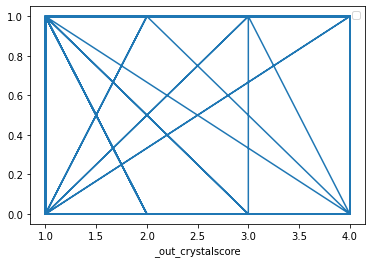

In [23]:
##how to generate a plot
#/plot returns a line graph containg data from every row in the Data 
#Frame. The x-axis values represent the rask of each insitution,

df.plot(x = "_out_crystalscore", y = ["_solv_GBL"])
plt.show()


In [24]:
#The series object provieds similar functionality.
##You can get each column of a DataFrame as a series object.
## This is an example of using the "_out_crystalscore_column"



_out_crystalscore_column = df["_out_crystalscore"]

type(_out_crystalscore_column)

pandas.core.series.Series

<AxesSubplot:ylabel='Frequency'>

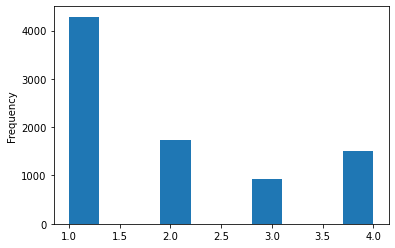

In [25]:
#Now that we've created a series object, we can then creat a plot for it. 
# A histogram is a greaty way to visualize how values are distributed across
# a dataset. Histograms group values into bins and display a count
# of the data point whose values are in a particular bin

#To create a histogram we would call .plot() and pass the sting hist 
# to the kind parameter

_out_crystalscore_column.plot(kind="hist")

# The histogram shows the data being grouped into ten bins that 
# range from 1 to 5 and each ben has a width of .5. The histogram
# The 

In [26]:
_solv_GBL_column= df["_solv_GBL"]
type(_solv_GBL_column)


pandas.core.series.Series

<AxesSubplot:ylabel='Frequency'>

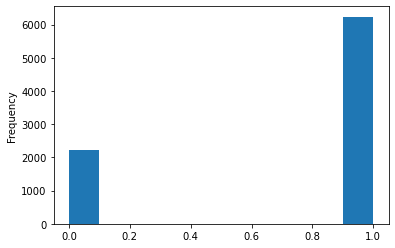

In [27]:
_solv_GBL_column.plot(kind = "hist")

In [29]:
#installing seaborn
import seaborn as sns

In [30]:
#lets make graphics in retina format to make them more sharp and legible
%config InlineBackend.figure_format = 'retina'

<AxesSubplot:xlabel='_out_crystalscore', ylabel='count'>

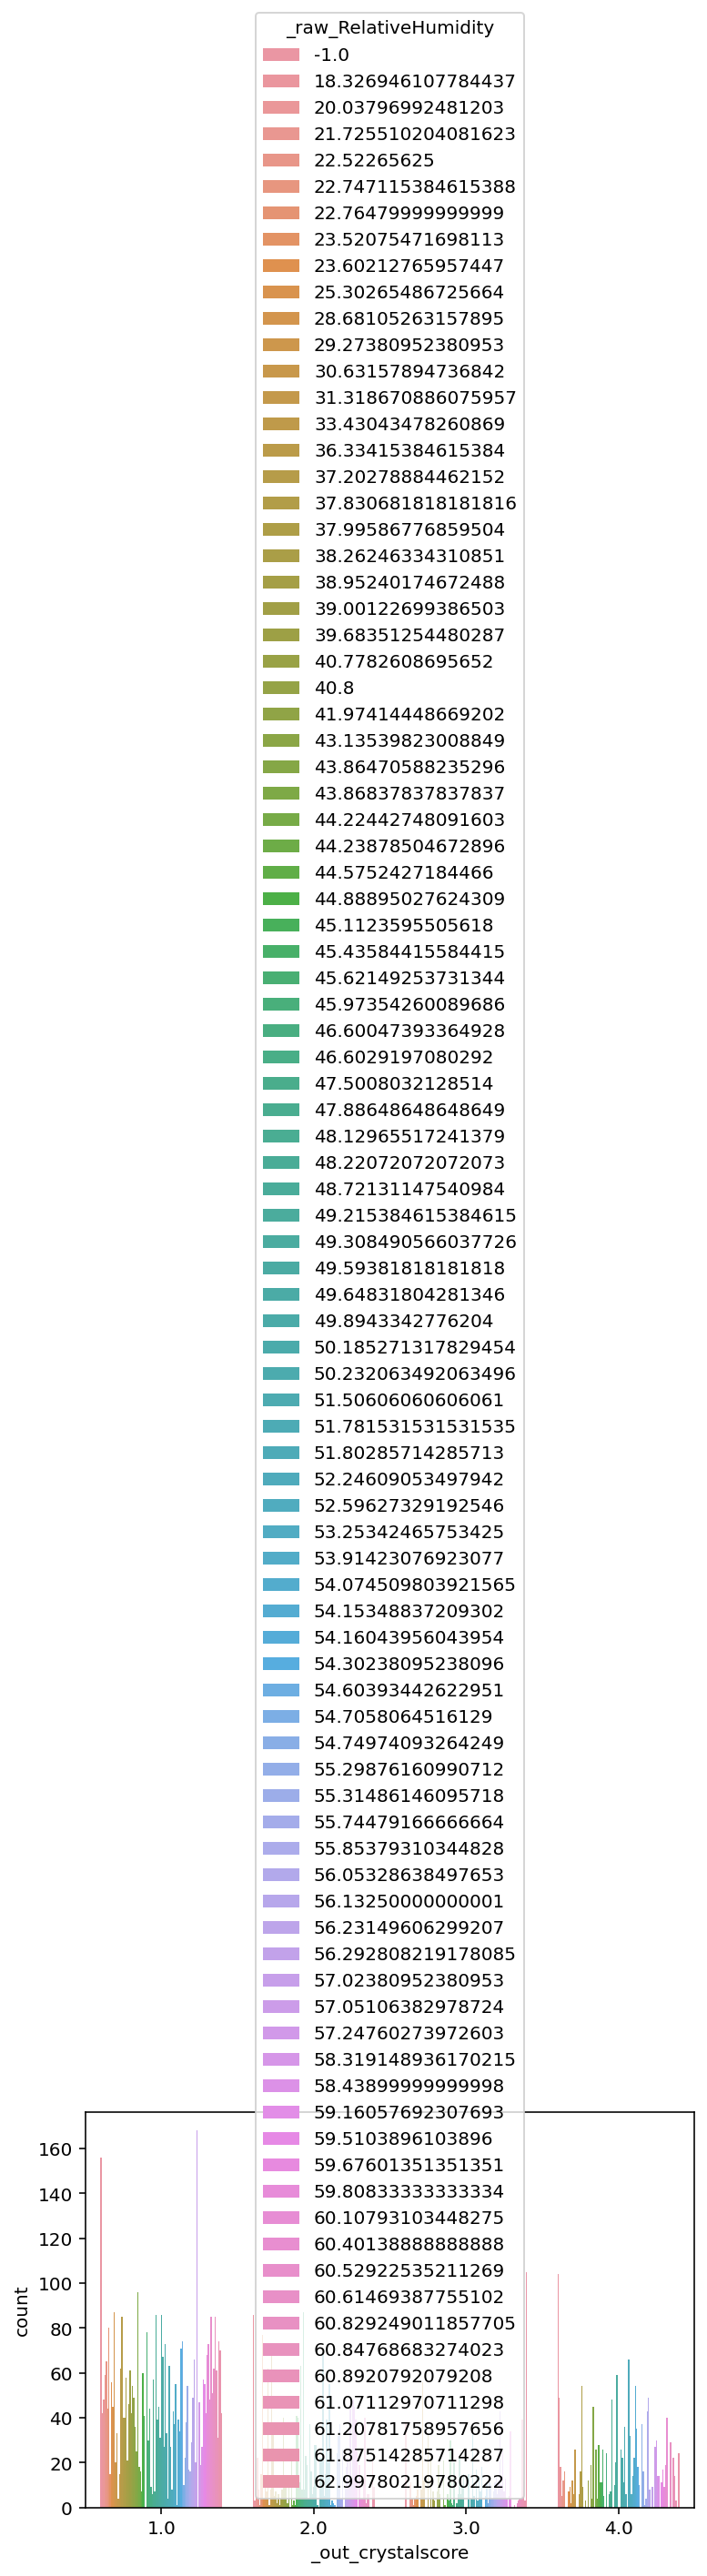

In [31]:
sns.countplot(x="_out_crystalscore", hue = "_raw_RelativeHumidity", data=df)

In [ ]:
#Building a quick decision tree model

In [32]:
y = df._out_crystalscore

In [41]:
df_features = ['_rxn_temperature_c','_raw_RelativeHumidity','_feat_organic_0_bondcount_std'
               ,'_rxn_reactiontime_s']

In [42]:
X = df[df_features]

In [43]:
X.describe()

,_rxn_temperature_c,_raw_RelativeHumidity,_feat_organic_0_bondcount_std,_rxn_reactiontime_s
count,8470.000000,8470.000000,8470.000000,8470.000000
mean,101.557261,45.693816,15.248996,12906.021251
std,10.612429,15.271596,6.227796,1631.213171
min,70.000000,-1.000000,7.000000,12600.000000
25%,105.000000,39.001227,10.000000,12600.000000
50%,105.000000,49.648318,15.000000,12600.000000
75%,105.000000,56.292808,19.000000,12600.000000
max,120.000000,62.997802,40.000000,21600.000000


In [44]:
y.describe()

count    8470.000000
mean        1.961275
std         1.153334
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         4.000000
Name: _out_crystalscore, dtype: float64

In [49]:
X.head(100)

,_rxn_temperature_c,_raw_RelativeHumidity,_feat_organic_0_bondcount_std,_rxn_reactiontime_s
0,105.0,-1.000000,10.0,12600.0
1,105.0,-1.000000,10.0,12600.0
2,105.0,-1.000000,10.0,12600.0
3,105.0,-1.000000,10.0,12600.0
4,105.0,-1.000000,10.0,12600.0
...,...,...,...,...
95,105.0,-1.000000,10.0,12600.0
96,105.0,52.246091,7.0,12600.0
97,105.0,52.246091,7.0,12600.0
98,105.0,52.246091,7.0,12600.0


In [47]:
y.head(10)

0    1.0
1    1.0
2    4.0
3    4.0
4    1.0
5    4.0
6    4.0
7    4.0
8    1.0
9    1.0
Name: _out_crystalscore, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor